<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/UnsupervisedLearning_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [83]:

#dataset
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

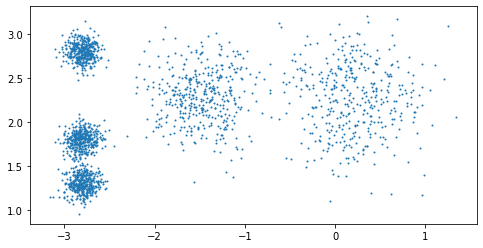

In [84]:
#dataset plot
plt.figure(figsize=(8, 4))
plt.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [85]:
#k-mean
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
print(y_pred, y_pred.shape)
print(kmeans.labels_, y_pred is kmeans.labels_)
print(kmeans.cluster_centers_, kmeans.cluster_centers_.shape)

[4 0 1 ... 3 1 0] (2000,)
[4 0 1 ... 3 1 0] True
[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]] (5, 2)


In [86]:
#new datat predict
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
print(kmeans.predict(X_new))

[1 1 3 3]


[[2.81093633 0.32995317 1.49439034 2.9042344  2.88633901]
 [5.80730058 2.80290755 4.4759332  5.84739223 5.84236351]
 [1.21475352 3.29399768 1.69136631 0.29040966 1.71086031]
 [0.72581411 3.21806371 1.54808703 0.36159148 1.21567622]]


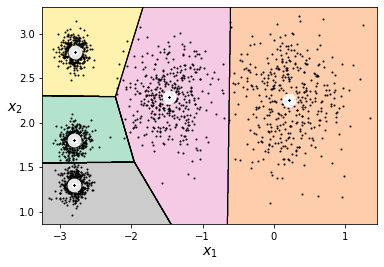

In [87]:
#결정 경계

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plot_decision_boundaries(kmeans, X)

print(kmeans.transform(X_new))

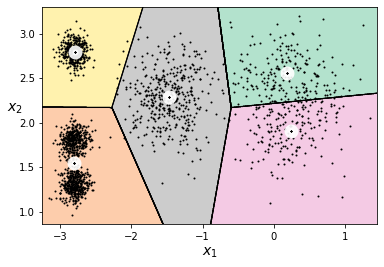

In [88]:
#random cluster
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1)
kmeans_random.fit(X)

plot_decision_boundaries(kmeans_random, X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=5
  after removing the cwd from sys.path.


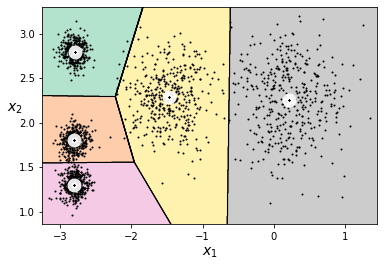

In [90]:
#초기화
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans_init = KMeans(n_clusters=k, init=good_init, n_init=5)
kmeans_init.fit(X)

plot_decision_boundaries(kmeans_init, X)

In [91]:
#이니셔 값
print(kmeans.inertia_, kmeans_random.inertia_, kmeans_init.inertia_)

211.5985372581684 219.84265621010567 211.5985372581684


In [92]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=k)
mini_batch_kmeans.fit(X)
#mini_batch_kmeans.partial_fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

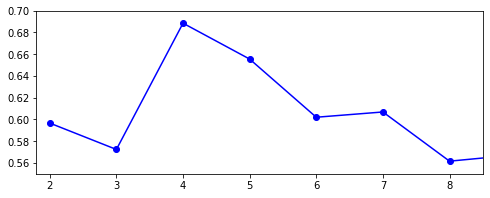

In [93]:
#최적의 클러스터 개수 찾기
from sklearn.metrics import silhouette_score

#print(silhouette_score(X, kmeans.labels_))

#1~9개의 클러스터를 가진 kmeans 배열
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [94]:
kmeans_per_k[0].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

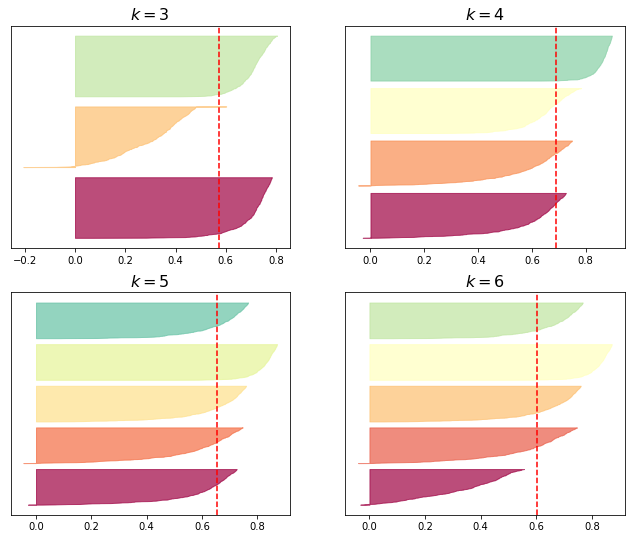

In [95]:
#실루엣 다이어그램

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 2, k-2)

    padding = len(X) // 30
    pos = padding
    ticks = []

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    for i in range(k):
        coeffs = silhouette_coefficients[y == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

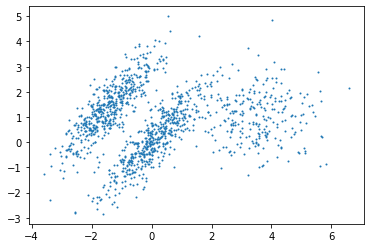

In [97]:
#원형이 아닌 데이터셋
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

2242.55042126599 0.42330347255623246
2179.6660887080325 0.3746488377389303


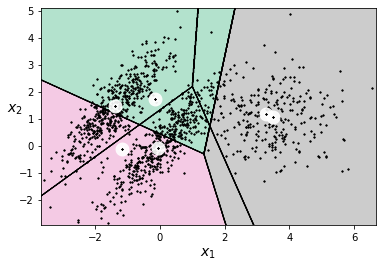

In [100]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

#이니셔, 실루엣점수
#결정 경계
print(kmeans_good.inertia_, silhouette_score(X, kmeans_good.labels_))
plot_decision_boundaries(kmeans_good, X)
print(kmeans_bad.inertia_,  silhouette_score(X, kmeans_bad.labels_))
plot_decision_boundaries(kmeans_bad, X)

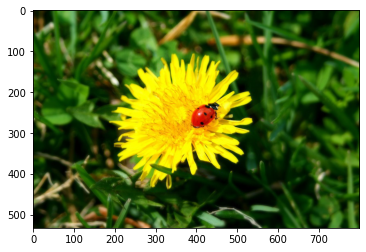

In [101]:
#군집을 사용한 이미지 분할
#색상 분할
from matplotlib.image import imread
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, filename)

image = imread(filename) #0~1
plt.imshow(image)

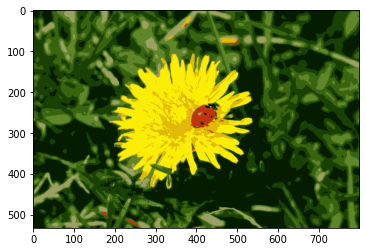

In [102]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

#각 픽셀에 할당된 클러스터 label에 맞게 픽셀값으로 클러스터 센트로이드 값을 넣는다.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

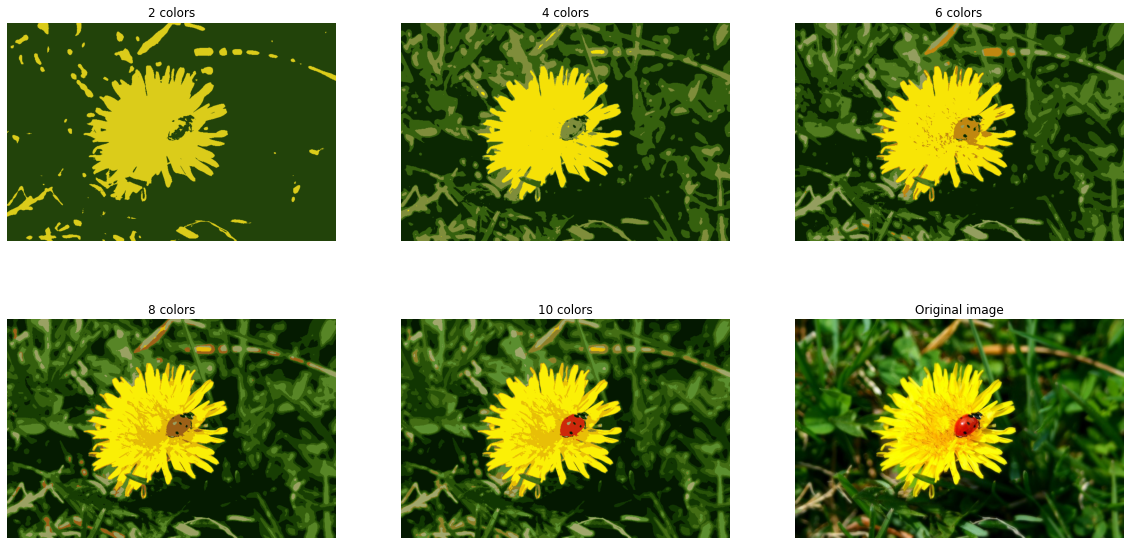

In [103]:
n_clusters = (2, 4, 6, 8, 10)
segmented_imgs = []
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


plt.figure(figsize=(20,10))

plt.subplot(236)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(231 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_cluster))
    plt.axis('off')
plt.show()

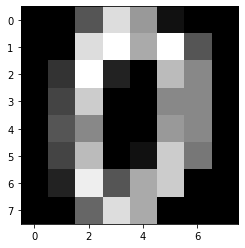

In [104]:
#군집을 통한 차원 축소
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

plt.imshow(X_digits[0].reshape(8,8), cmap='gray')

In [105]:
#전처리 없이
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

#군집 전처리
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                    ('kmeans', KMeans(n_clusters=50)),
                    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.9644444444444444
0.9711111111111111


In [ ]:
#최적의 클러스터수 찾아보기
'''
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(30,110))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

from IPython.display import clear_output
clear_output()

print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))
'''

In [106]:
#준지도 학습
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7888888888888889

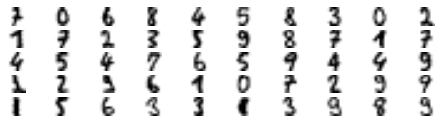

In [107]:
#훈련 세트를 50개의 클러스터로 모은다
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
#기존 특성수 -> 50개의 클러스터의 센트로이드까지의 거리로 맵핑된 세트
X_digits_dist = kmeans.fit_transform(X_train)
#클러스터별 센트로이드와 가장 가까운 이미지의 인덱스
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
#센트로이드를 대표하는 이미지들
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [108]:
#클러스터를 대표하는 훈련에만 레이블 수동 할당
y_representative_digits = y_train[representative_digit_idx]

In [109]:
#각 클러스터를 대표하는 이미지로 지도 학습
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9133333333333333

In [110]:
#각 클러스터에 있는 대표 레이블을 모든 샘플에 전파한다.
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

#레이블 전파후 훈련
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9488888888888889

In [111]:
print(X_digits_dist[0])
print(np.argmin(X_digits_dist[0]))
print(kmeans.labels_[0])

[48.39843266 38.98885255 46.6673195  40.12053523 55.14402874 30.6397804
 44.18441074 25.6306718  33.39203104 36.63163478 43.28879763 52.82629648
 41.60697425 41.80045188 48.5749071  26.5447735  34.5746475  47.85407493
 50.8754531  49.56149551 53.38143407 41.29053358 54.60515086 48.38604327
 51.82352491 42.77396167 48.69796042 55.90142224 54.97466569 28.93971224
 50.9250416  38.2426167  25.53604328 51.12440165 48.96534489 36.26851247
 46.28468002 41.24393558 20.16203804 46.33822147 51.4814016  50.93280279
 48.96214173 34.42494623 31.9180719  49.27419022 29.39773989 32.46639288
 39.46649423 22.63711309]
38
38


In [112]:
#모든 샘플에 레이블을 전파하기보다, 센트로이드와 가까운 특정 비율에만 전파한다

percentile_closest = 50

#각 샘플에 맞는 클러스터 센트로이드사이 거리
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    #클러스터에 포함되는 샘플
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    #특정 비율까지의 경계선을 찾는다.
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    #경계선보다 거리가 높은 것을 찾는다
    above_cutoff = (X_cluster_dist > cutoff_distance)
    #비율에 속하지 않는 클러스터속 샘플을 제거한다
    X_cluster_dist[in_cluster & above_cutoff] = -1

#샘플을 제외한 마스크
partially_propagated =  (X_cluster_dist != -1)
#제거완료한 훈련 샘플 세트
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg.score(X_test, y_test))

print(np.mean(y_train_partially_propagated == y_train[partially_propagated]))

0.9444444444444444
0.9941434846266471


[ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2  2  4  2  2  4  0  5  1  0
  5  5  3  2  2  2  4  5  0  6  1 -1  0  0  2  3 -1  3  4 -1  4  4  2  0
  6  2]


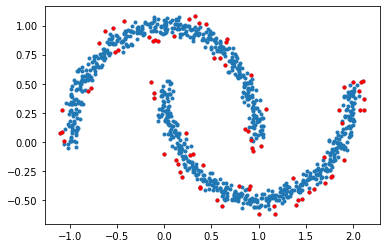

In [113]:
#DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

#-1 값은 이상치
print(dbscan.labels_[:50])

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[dbscan.labels_== -1, 0], X[dbscan.labels_==-1, 1], 'r.')

In [114]:
#핵심 샘플의 인덱스
print(len(dbscan.core_sample_indices_), dbscan.core_sample_indices_[:6])
#핵심 샘플의 성분
print(dbscan.components_.shape,'\n',dbscan.components_)

808 [0 4 5 6 7 8]
(808, 2) 
 [[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


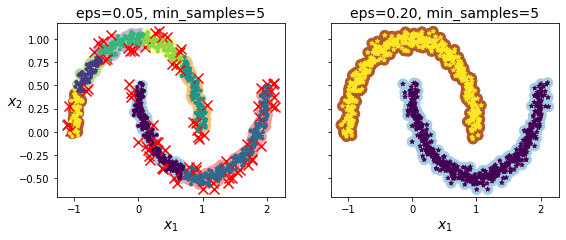

In [115]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    #핵심 샘플 = True
    core_mask[dbscan.core_sample_indices_] = True
    #이상치 샘플 = True
    anomalies_mask = dbscan.labels_ == -1
    #핵심도 이상치 샘플도 아닌 일반 샘플
    non_core_mask = ~(core_mask | anomalies_mask)
    
    #핵심 샘플 성분
    cores = dbscan.components_
    #이상치 샘플 성분
    anomalies = X[anomalies_mask]
    #일반 샘플 성분
    non_cores = X[non_core_mask]

    #핵심 샘플 scatter
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")

    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    #이상치 x 표시
    plt.scatter(anomalies[:, 0], anomalies[:, 1],c="r", marker="x", s=100)
    #일반 샘플
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=100, show_ylabels=False)
plt.show()
dbscan = dbscan2

In [116]:
from sklearn.neighbors import KNeighborsClassifier

#핵심 샘플만을 사용해서 훈련한 분류기
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

[1 0 1 0]
[[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


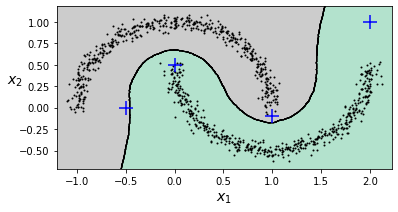

array([-1,  0,  1, -1])

In [120]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()